<a href="https://colab.research.google.com/github/ShrishtiSingh26/SONAR-Rock-vs-Mine-Prediction-/blob/main/Soanr_MineRock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(207, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float

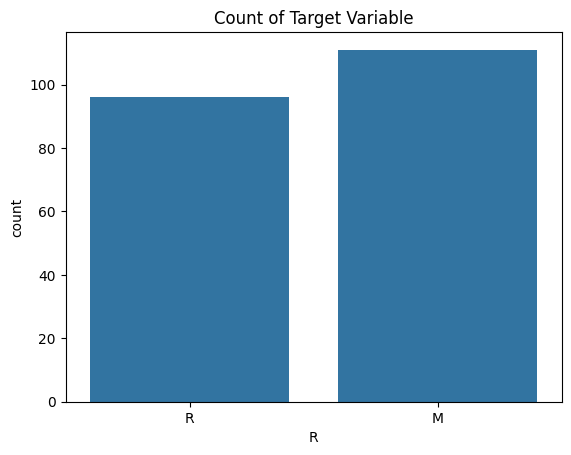

     0.0200    0.0371    0.0428    0.0207    0.0954    0.0986    0.1539  \
R                                                                         
M  0.034989  0.045544  0.050720  0.064768  0.086715  0.111864  0.128359   
R  0.022524  0.030232  0.035879  0.041664  0.061680  0.096199  0.113767   

     0.1601    0.3109    0.2111  ...    0.0232    0.0027    0.0065    0.0159  \
R                                ...                                           
M  0.149832  0.213492  0.251022  ...  0.019352  0.016014  0.011643  0.012185   
R  0.117153  0.135584  0.158785  ...  0.012198  0.010533  0.009673  0.009451   

     0.0072    0.0167    0.0180    0.0084    0.0090    0.0032  
R                                                              
M  0.009923  0.008914  0.007825  0.009060  0.008695  0.006930  
R  0.008581  0.007333  0.007708  0.006659  0.007058  0.006053  

[2 rows x 60 columns]
Logistic Regression Accuracy: 0.7619047619047619
KNN Accuracy: 0.7857142857142857
Random Forest Acc

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('sonar_data.csv')

# Display the shape of the dataset
print(data.shape)  # Corrected from data.shape() to data.shape

# Display information about the dataset
data.info()

# Check for missing values in the dataset
print(data.isnull().sum())

# Get statistical summary of the dataset
print(data.describe())

# Display the columns of the dataset
print(data.columns)

# Plot the count of the target variable (assuming it is at index 60)
sns.countplot(x=data.iloc[:, 60])  # Changed to data.iloc[:, 60] for proper indexing
plt.title('Count of Target Variable')
plt.show()

# Calculate the mean of each feature grouped by the target variable
mean_values = data.groupby(data.columns[60]).mean()
print(mean_values)  # Print the mean values for better visibility

# Separate features and target variable
x = data.drop(data.columns[60], axis=1)  # Features
y = data.iloc[:, 60]                      # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Logistic Regression model
lr = LogisticRegression(max_iter=200)  # Set max_iter to ensure convergence
lr.fit(x_train, y_train)                # Train the model
y_pred1 = lr.predict(x_test)            # Make predictions
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1))  # Calculate accuracy

# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)               # Train the model
y_pred2 = knn.predict(x_test)           # Make predictions
print("KNN Accuracy:", accuracy_score(y_test, y_pred2))  # Calculate accuracy

# Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)                 # Train the model
y_pred3 = rf.predict(x_test)             # Make predictions
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred3))  # Calculate accuracy

# Stochastic Gradient Descent model
sgd = SGDClassifier()

# Train using partial_fit
sgd.partial_fit(x_train, y_train, classes=y.unique())  # Corrected to use y.unique()

# Calculate and print the score on the test set
score = sgd.score(x_test, y_test)
print("SGD Classifier Accuracy:", score)
